In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval

import sys
sys.path.insert(0, "../") 

from importlib import reload
from tblib import lattice
from tblib import hamiltonian
from tblib import sc_AHM
from tblib import plotting
from tblib import superfluid as sf

reload(lattice)
reload(hamiltonian)
reload(sf)
reload(sc_AHM)

<module 'tblib.sc_AHM' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tests\\..\\tblib\\sc_AHM.py'>

# Superfluid Weight at T=0K
- get superfluid weight tensor $D$ and $D_s(0)=\sqrt{det D}$
- $D_{\mu, \nu}^s=\sum_{\vec{k},i,j}\frac{n(E_j)-n(E_i)}{E_i-E_j}(\langle\Psi_i|\partial_{\mu}H|\Psi_j\rangle\langle\Psi_j|\partial_{\nu}H|\Psi_i\rangle-\langle\Psi_i|\partial_{\mu}H\gamma^z|\Psi_j\rangle\langle\Psi_j|\gamma^z\partial_{\nu}H|\Psi_i\rangle)$
    - $\implies D_{\mu, \nu}^s=\sum \text{prefactor}\times(\text{diamagnetic part}-\text{paramagnetic part})$
    - plot contribution of prefactor, diamagnetic and paramagnetic term over k-space (0 to 2pi) for any energy pair


In [82]:
ham = hamiltonian.Model(N=2, kind='dDSL', delta=[1,1], ns=[0.5,0.5], nu=3, U=[1,1], mu=[-1,-1])
dels, nus, mus = sc_AHM.self_consistency_loop(ham, nk=40,HF=True, alpha=0.7, Nmin=10, Nmax=1200)

In [83]:
sfw, term = sf.SFW(ham,81)
sf.detSFW(ham,41)

(array([[-1.91222360e-01-4.35179200e-19j, -6.48805671e-18-8.55555137e-35j],
        [-5.25938025e-18-8.29776777e-35j, -1.91222360e-01-4.35179200e-19j]]),
 (0.19122235999002635+4.351791995275637e-19j))

In [86]:
sfw

(-0.19136002177958267-8.5117228863786375e-19j)

In [109]:
ep = 16 # energy pair 
pfgrid = term[:,0,ep].reshape(81,81)
diam = term[:,1,ep].reshape(81,81)
param = term[:,2,ep].reshape(81,81)

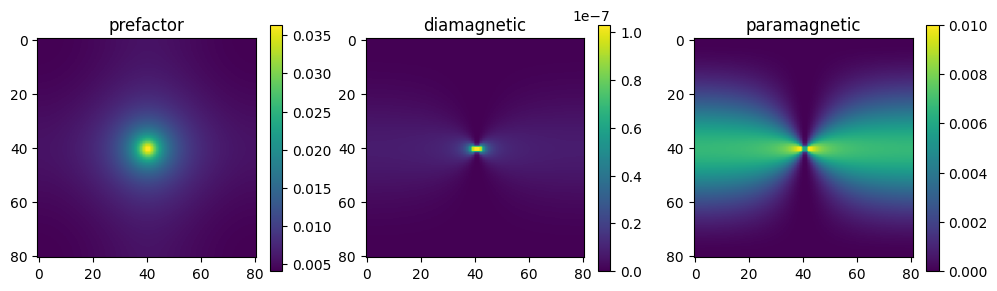

In [110]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,16))
axes[0].set_title('prefactor')
axes[1].set_title('diamagnetic')
axes[2].set_title('paramagnetic')
ax0 = axes[0].imshow(pfgrid)
ax1 = axes[1].imshow(diam)
ax2 = axes[2].imshow(param)
fig.colorbar(ax0, shrink=0.2)
fig.colorbar(ax1, shrink=0.2)
fig.colorbar(ax2, shrink=0.2)
plt.show()

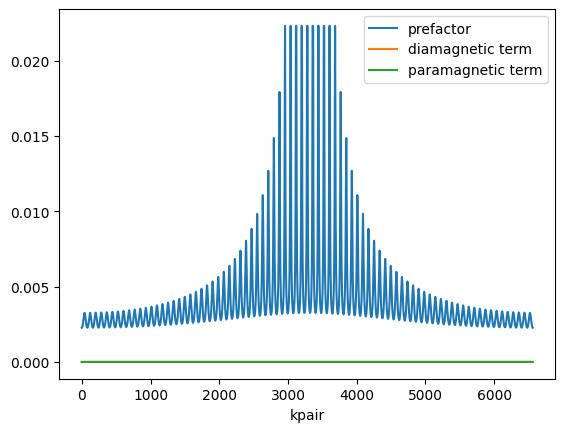

In [85]:
plt.xlabel('kpair')
plt.plot(term[:, 0, 10], label='prefactor')
plt.plot(term[:, 1, 10], label='diamagnetic term')
plt.plot(term[:, 2, 10], label='paramagnetic term')
plt.legend()